# Exploratory Data Analysis

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import os
from PIL import Image
import cv2
from collections import Counter

styles_df = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv', on_bad_lines = 'skip')

# Display basic info
print("Labels Shape:", styles_df.shape)
print("\nColumn Names:")
print(styles_df.columns.tolist())
print("\nFirst few rows:")
print(styles_df.head())
print(f"\nMissing values per column:")
print(styles_df.isnull().sum())

Labels Shape: (44424, 10)

Column Names:
['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']

First few rows:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0 

In [32]:
# Define target variables for multi-label classification
target_variables = ['baseColour', 'articleType', 'season', 'gender']

# Analyze distribution for each target variable
def analyze_target_distribution(styles_df, target_variables):
    target_analysis = {}
    
    for var in target_variables:
        if var in styles_df.columns:
            print(f"\n{'='*50}")
            print(f"TARGET VARIABLE: {var.upper()}")
            print(f"{'='*50}")
            
            # Basic statistics
            value_counts = styles_df[var].value_counts()
            print(f"Total unique classes: {styles_df[var].nunique()}")
            print(f"Missing values: {styles_df[var].isnull().sum()}")
            print(f"Class imbalance ratio: {value_counts.max() / value_counts.min():.2f}")
            
            # Top 10 classes
            print(f"\nTop 10 classes:")
            print(value_counts.head(10))
            
            # Bottom 5 classes (smallest)
            print(f"\nBottom 5 classes:")
            print(value_counts.tail(5))
            
            # Store analysis
            target_analysis[var] = {
                'unique_classes': styles_df[var].nunique(),
                'missing_values': styles_df[var].isnull().sum(),
                'distribution': value_counts,
                'imbalance_ratio': value_counts.max() / value_counts.min()
            }
        else:
            print(f"Warning: {var} not found in dataset")
    
    return target_analysis

# Run target analysis
target_analysis = analyze_target_distribution(styles_df, target_variables)

# Summary statistics
print(f"\n{'='*70}")
print("TARGET VARIABLES SUMMARY")
print(f"{'='*70}")

for var in target_variables:
    if var in target_analysis:
        analysis = target_analysis[var]
        print(f"\n{var.upper()}:")
        print(f"  Classes: {analysis['unique_classes']}")
        print(f"  Missing: {analysis['missing_values']}")
        print(f"  Imbalance Ratio: {analysis['imbalance_ratio']:.2f}")
        print(f"  Most Common: {analysis['distribution'].index[0]} ({analysis['distribution'].iloc[0]} samples)")
        print(f"  Least Common: {analysis['distribution'].index[-1]} ({analysis['distribution'].iloc[-1]} samples)")



TARGET VARIABLE: BASECOLOUR
Total unique classes: 46
Missing values: 15
Class imbalance ratio: 1945.60

Top 10 classes:
baseColour
Black        9728
White        5538
Blue         4918
Brown        3494
Grey         2741
Red          2455
Green        2115
Pink         1860
Navy Blue    1789
Purple       1640
Name: count, dtype: int64

Bottom 5 classes:
baseColour
Sea Green            22
Mushroom Brown       16
Taupe                11
Lime Green            6
Fluorescent Green     5
Name: count, dtype: int64

TARGET VARIABLE: ARTICLETYPE
Total unique classes: 143
Missing values: 0
Class imbalance ratio: 7067.00

Top 10 classes:
articleType
Tshirts         7067
Shirts          3217
Casual Shoes    2845
Watches         2542
Sports Shoes    2036
Kurtas          1844
Tops            1762
Handbags        1759
Heels           1323
Sunglasses      1073
Name: count, dtype: int64

Bottom 5 classes:
articleType
Body Wash and Scrub    1
Shoe Laces             1
Hair Accessory         1
Suits     

In [33]:
print(f"Samples before cleaning: {len(styles_df)}")
styles_df = styles_df.dropna(subset=target_variables)
print(f"Samples after cleaning: {len(styles_df)}")

Samples before cleaning: 44424
Samples after cleaning: 44388


Creating Target Variable Visualizations...


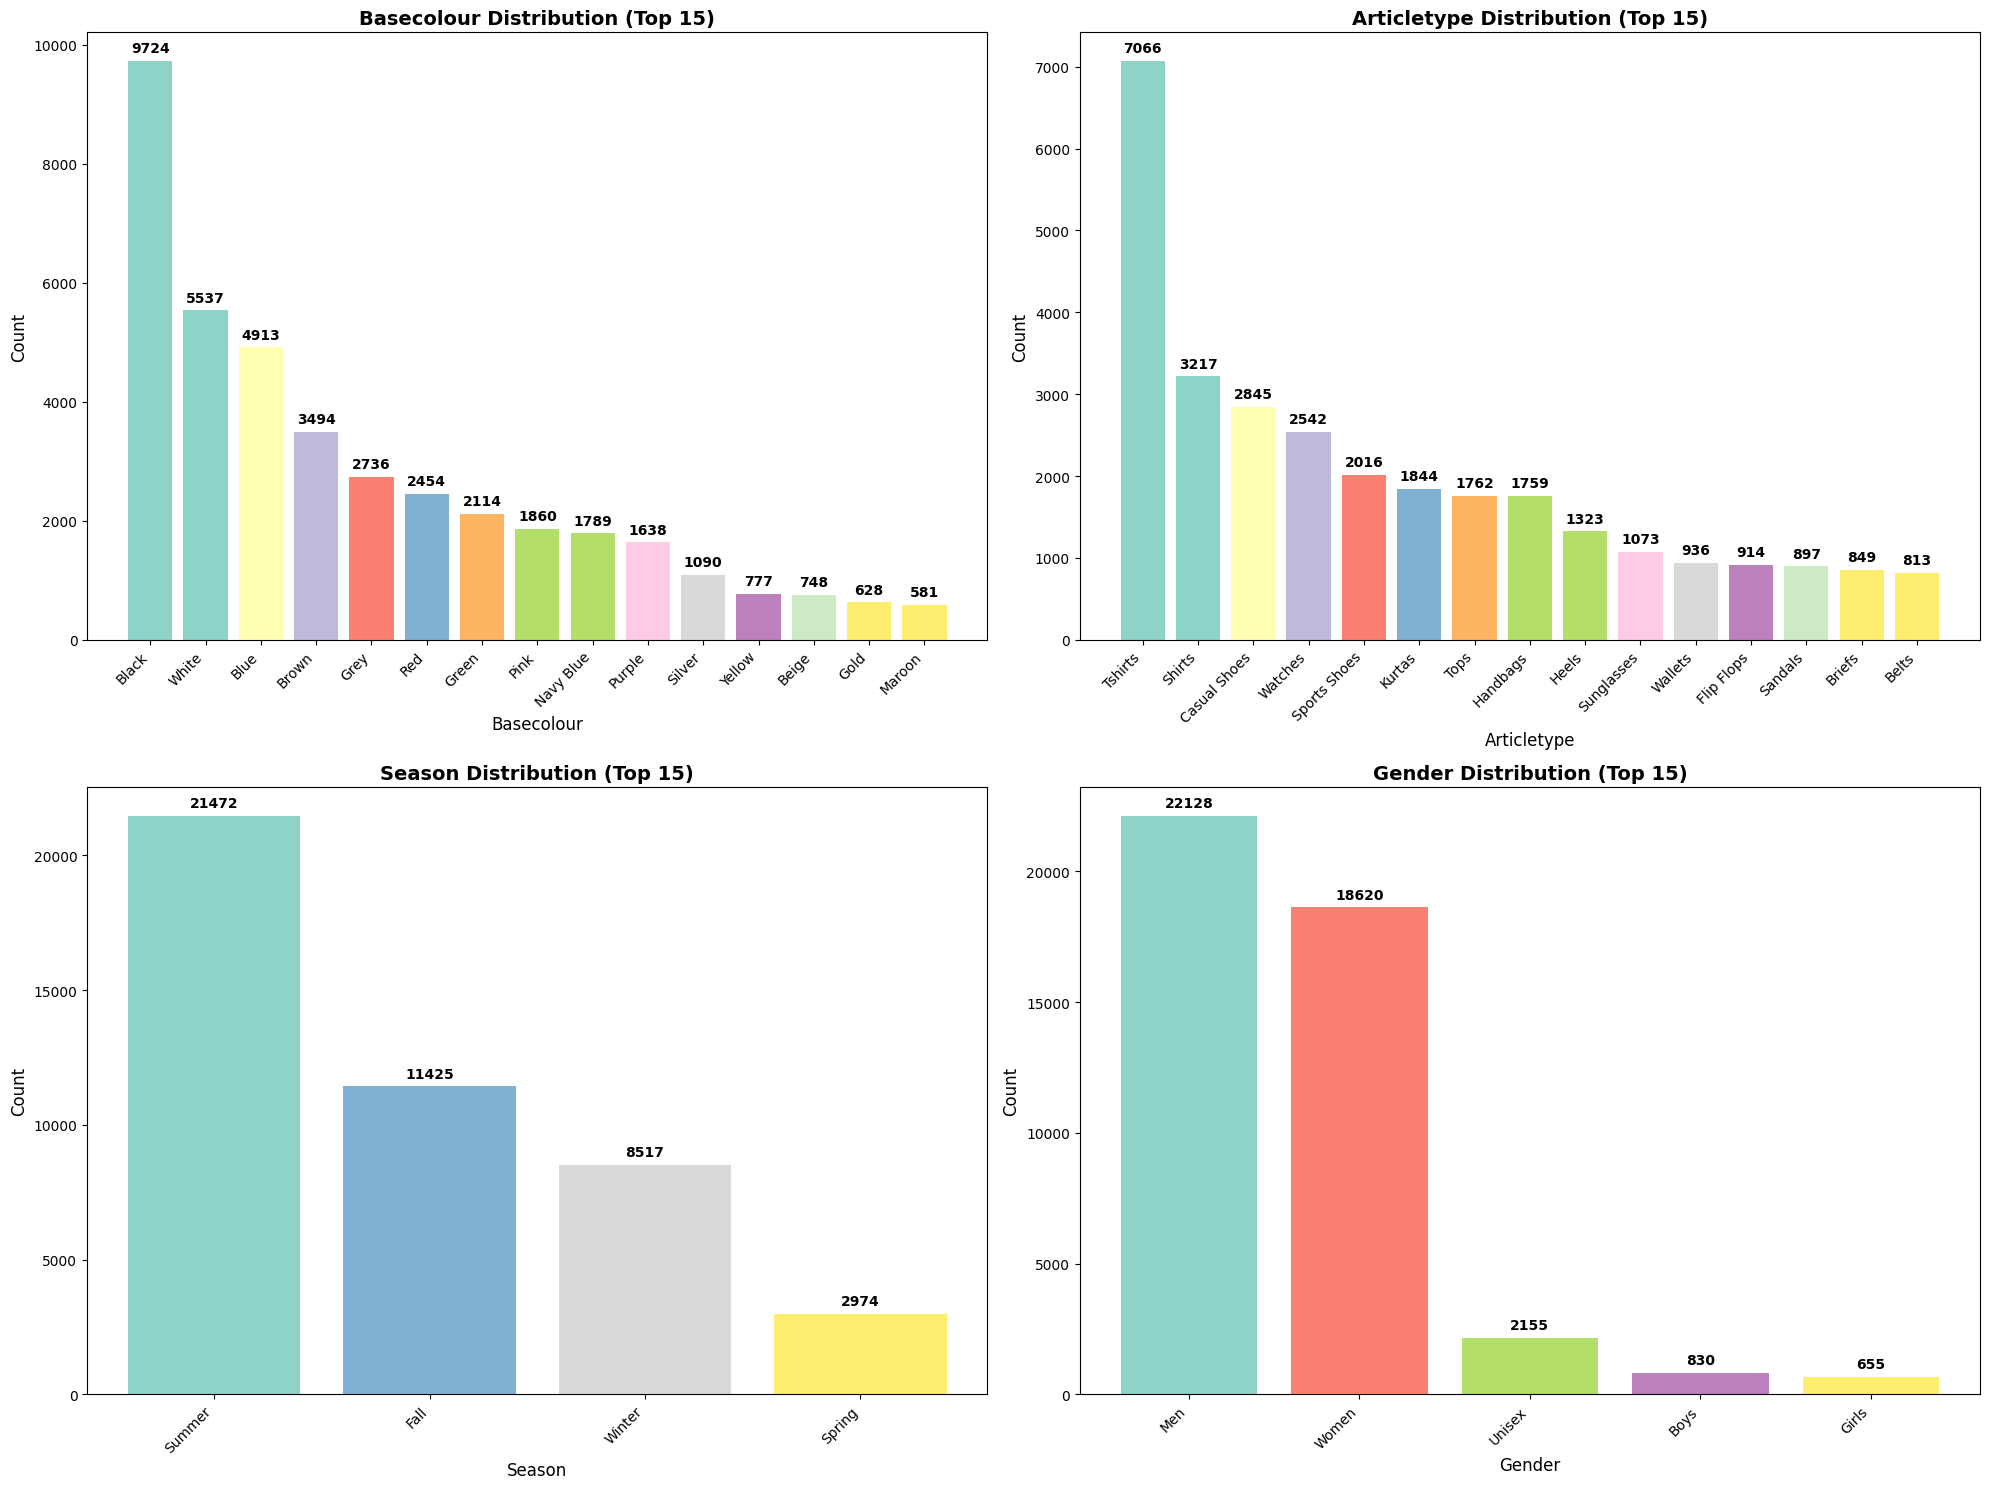


Creating Pie Chart Distributions...


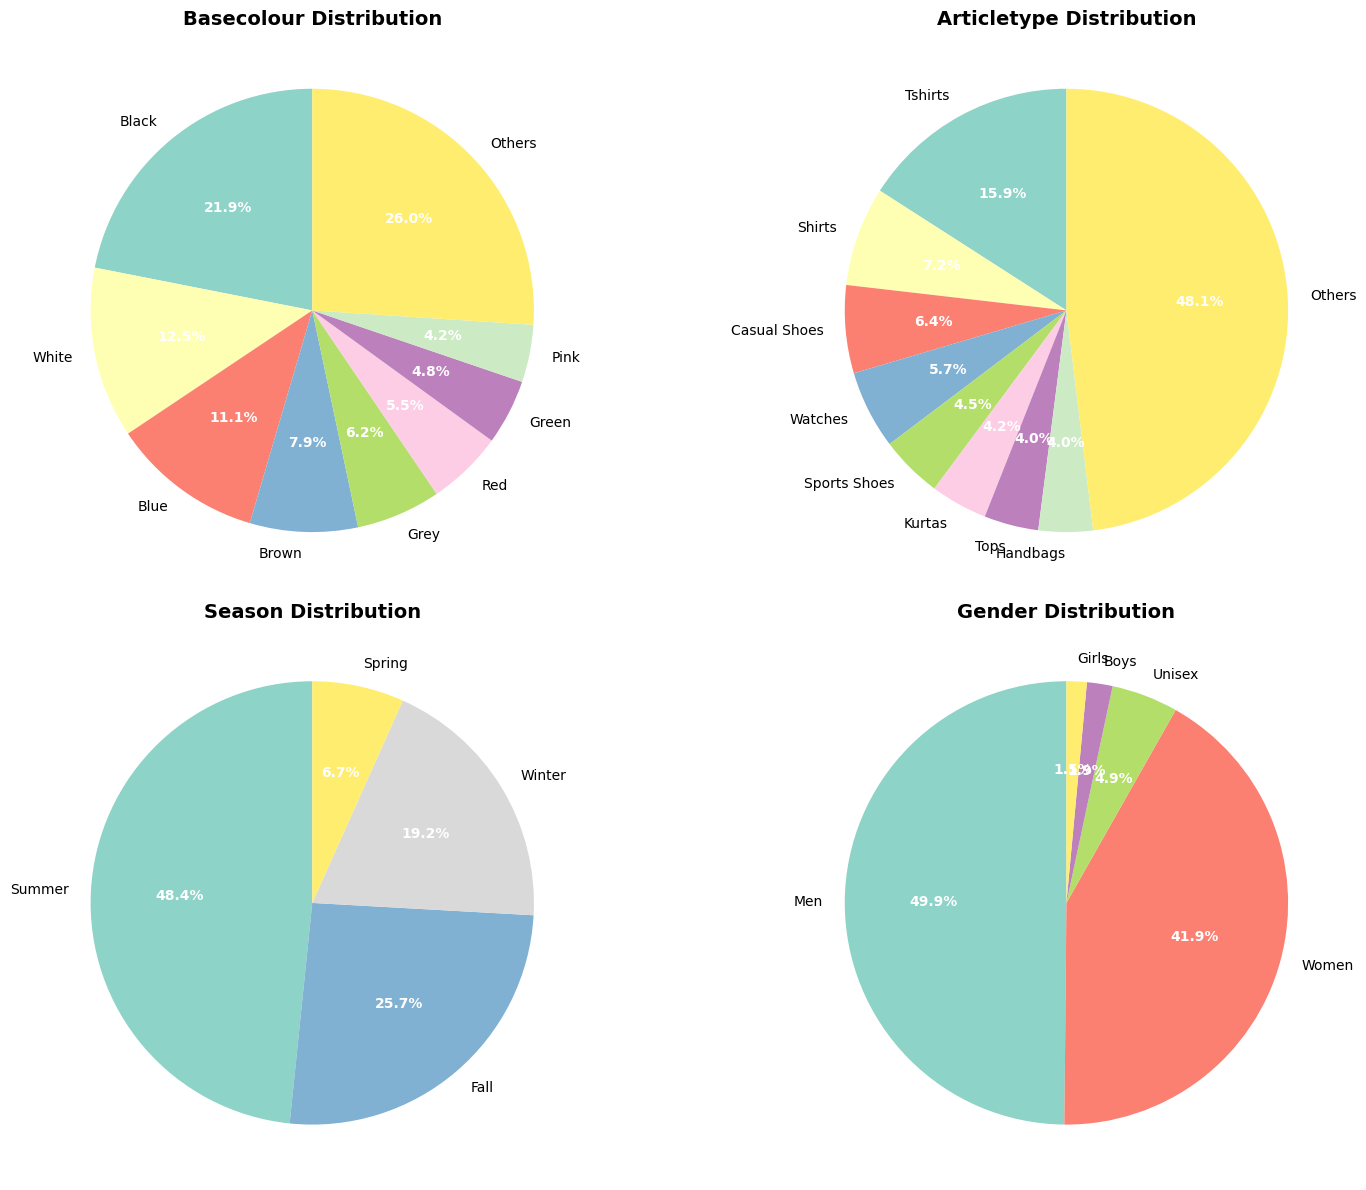


Creating Imbalance Analysis...


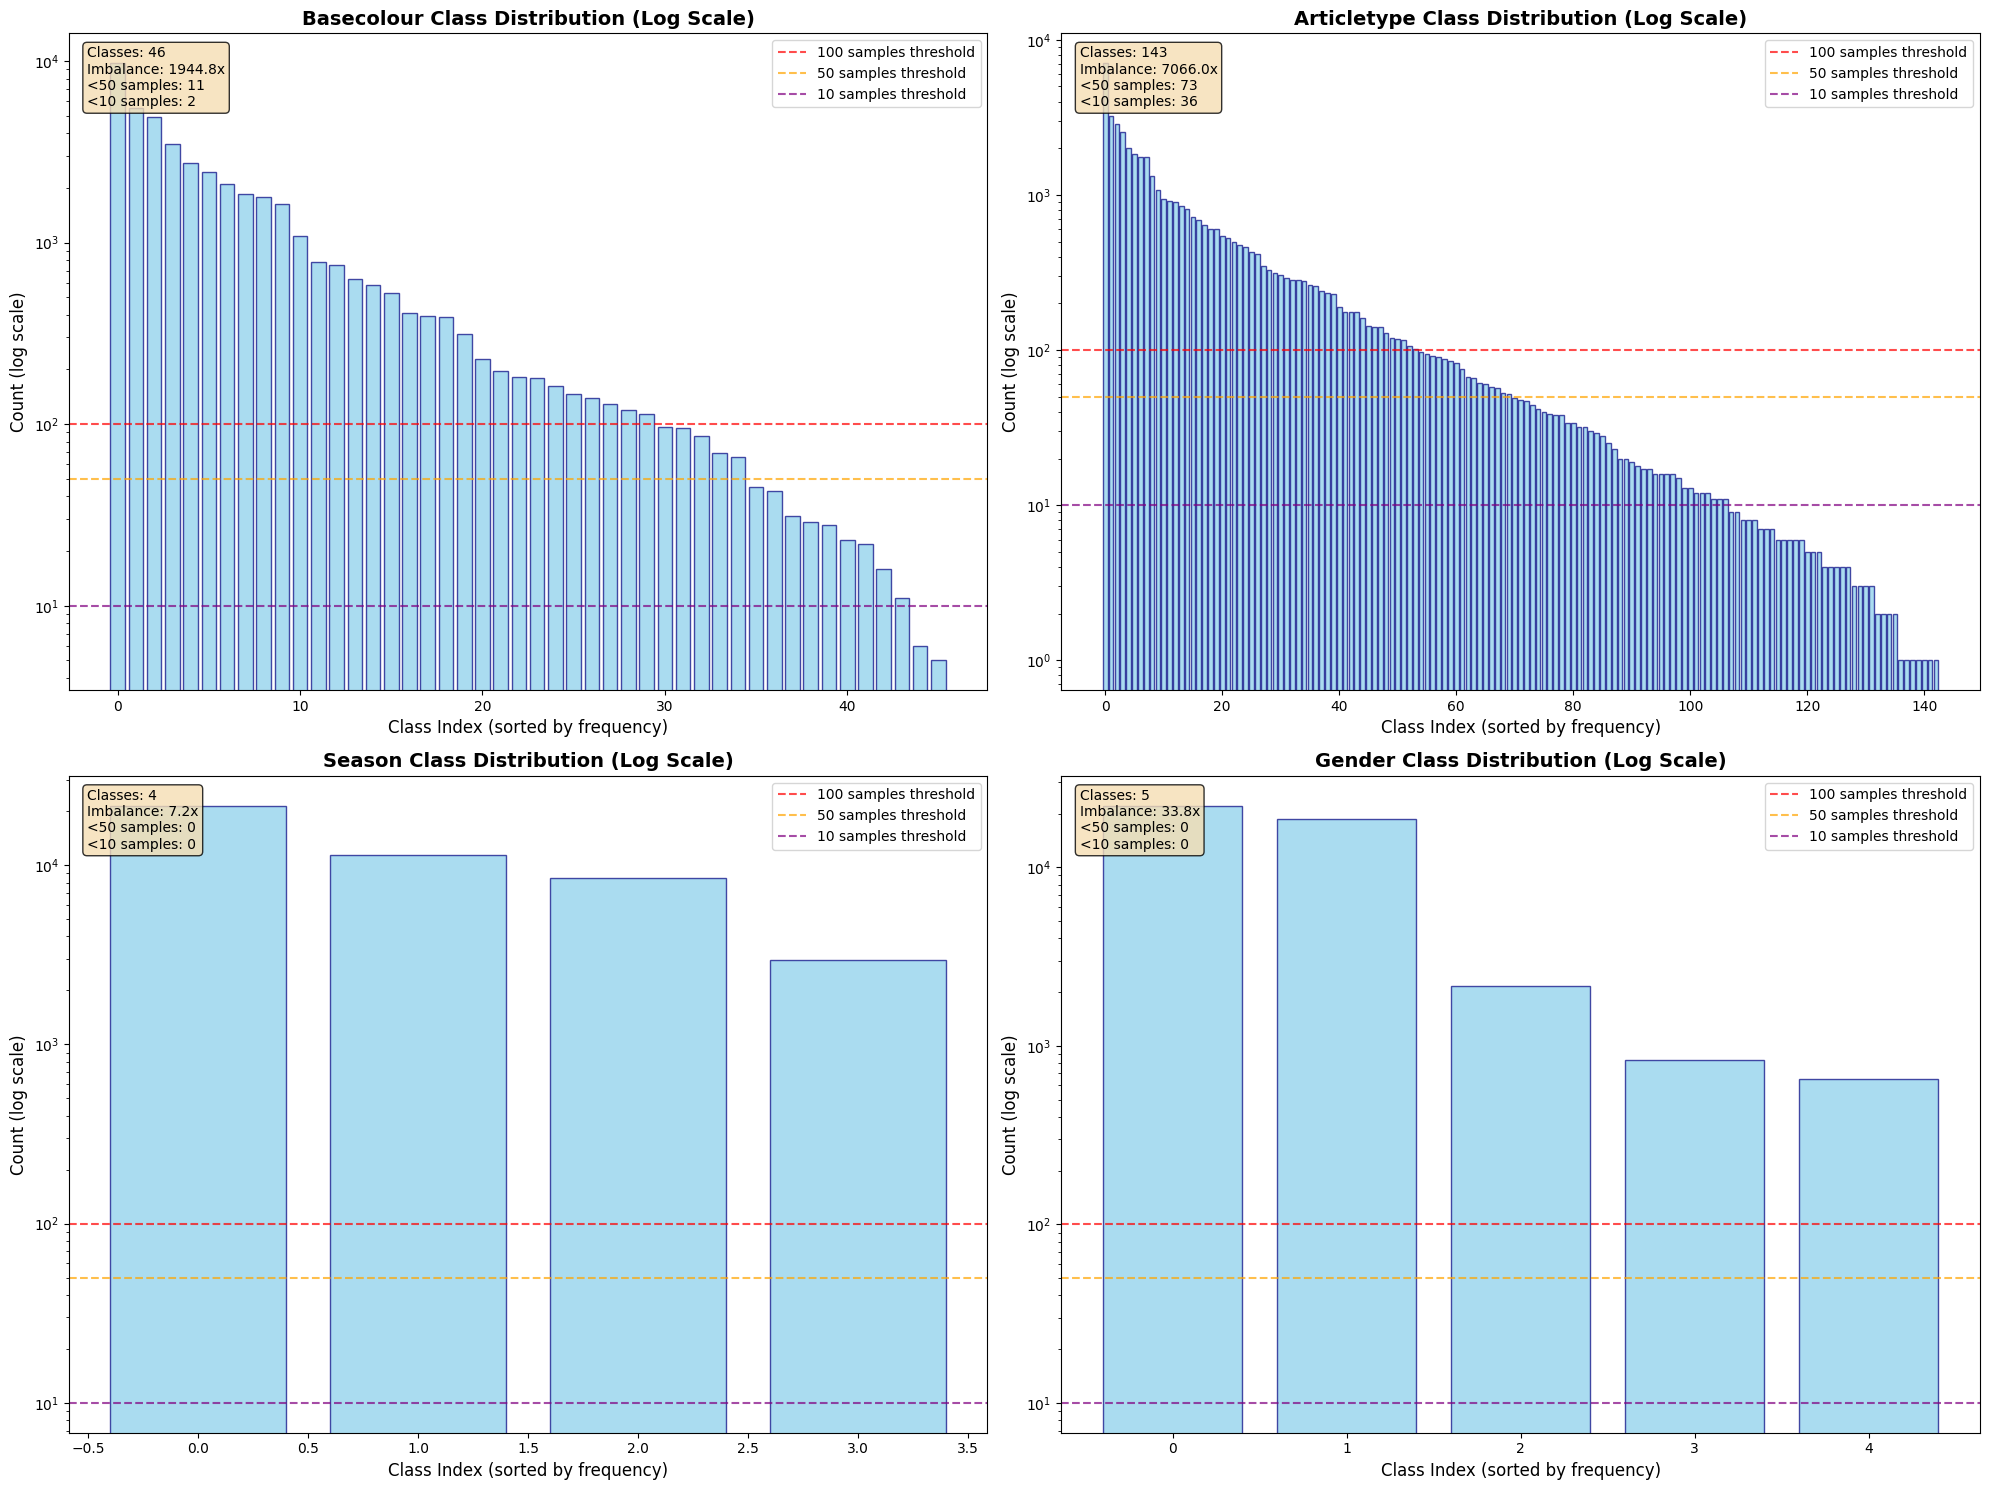


VISUALIZATION SUMMARY
   Variable  Total Classes    Most Common          Least Common Imbalance Ratio  Classes < 50  Classes < 10
 baseColour             46   Black (9724) Fluorescent Green (5)         1944.8x            11             2
articleType            143 Tshirts (7066)              Ipad (1)         7066.0x            73            36
     season              4 Summer (21472)         Spring (2974)            7.2x             0             0
     gender              5    Men (22128)           Girls (655)           33.8x             0             0


In [34]:
# Create comprehensive visualizations for target variables
def create_target_visualizations(df, target_variables):
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, var in enumerate(target_variables):
        if var in df.columns:
            # Get top 15 classes for better visibility
            top_classes = df[var].value_counts().head(15)
            
            # Create bar plot
            colors = plt.cm.Set3(np.linspace(0, 1, len(top_classes)))
            bars = axes[i].bar(range(len(top_classes)), top_classes.values, color=colors)
            axes[i].set_title(f'{var.capitalize()} Distribution (Top 15)', fontsize=14, fontweight='bold')
            axes[i].set_xlabel(var.capitalize(), fontsize=12)
            axes[i].set_ylabel('Count', fontsize=12)
            axes[i].set_xticks(range(len(top_classes)))
            axes[i].set_xticklabels(top_classes.index, rotation=45, ha='right')
            
            # Add value labels on bars
            for j, v in enumerate(top_classes.values):
                axes[i].text(j, v + max(top_classes.values)*0.01, str(v), 
                           ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Create pie charts for major categories
def create_pie_charts(df, target_variables):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for i, var in enumerate(target_variables):
        if var in df.columns:
            # Get top 8 classes and group others
            top_classes = df[var].value_counts().head(8)
            others_count = df[var].value_counts().tail(-8).sum()
            
            if others_count > 0:
                plot_data = top_classes.copy()
                plot_data['Others'] = others_count
            else:
                plot_data = top_classes
            
            # Create pie chart with custom colors
            colors = plt.cm.Set3(np.linspace(0, 1, len(plot_data)))
            wedges, texts, autotexts = axes[i].pie(plot_data.values, labels=plot_data.index, 
                                                  autopct='%1.1f%%', startangle=90, colors=colors)
            axes[i].set_title(f'{var.capitalize()} Distribution', fontsize=14, fontweight='bold')
            
            # Improve text formatting
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(10)
    
    plt.tight_layout()
    plt.show()

# Create imbalance analysis visualization
def create_imbalance_analysis(df, target_variables):
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    axes = axes.flatten()
    
    for i, var in enumerate(target_variables):
        if var in df.columns:
            value_counts = df[var].value_counts()
            
            # Create log-scale visualization to show imbalance
            axes[i].bar(range(len(value_counts)), value_counts.values, 
                       color='skyblue', alpha=0.7, edgecolor='navy')
            axes[i].set_yscale('log')
            axes[i].set_title(f'{var.capitalize()} Class Distribution (Log Scale)', 
                            fontsize=14, fontweight='bold')
            axes[i].set_xlabel('Class Index (sorted by frequency)', fontsize=12)
            axes[i].set_ylabel('Count (log scale)', fontsize=12)
            
            # Add horizontal lines for thresholds
            axes[i].axhline(y=100, color='red', linestyle='--', alpha=0.7, 
                          label='100 samples threshold')
            axes[i].axhline(y=50, color='orange', linestyle='--', alpha=0.7, 
                          label='50 samples threshold')
            axes[i].axhline(y=10, color='purple', linestyle='--', alpha=0.7, 
                          label='10 samples threshold')
            axes[i].legend()
            
            # Add statistics text
            stats_text = f'Classes: {len(value_counts)}\nImbalance: {value_counts.max()/value_counts.min():.1f}x\n<50 samples: {sum(value_counts < 50)}\n<10 samples: {sum(value_counts < 10)}'
            axes[i].text(0.02, 0.98, stats_text, transform=axes[i].transAxes, 
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Run all visualizations with styles_df
print("Creating Target Variable Visualizations...")
create_target_visualizations(styles_df, target_variables)

print("\nCreating Pie Chart Distributions...")
create_pie_charts(styles_df, target_variables)

print("\nCreating Imbalance Analysis...")
create_imbalance_analysis(styles_df, target_variables)

# Summary statistics table
print("\n" + "="*80)
print("VISUALIZATION SUMMARY")
print("="*80)

summary_data = []
for var in target_variables:
    if var in styles_df.columns:
        value_counts = styles_df[var].value_counts()
        summary_data.append({
            'Variable': var,
            'Total Classes': len(value_counts),
            'Most Common': f"{value_counts.index[0]} ({value_counts.iloc[0]})",
            'Least Common': f"{value_counts.index[-1]} ({value_counts.iloc[-1]})",
            'Imbalance Ratio': f"{value_counts.max()/value_counts.min():.1f}x",
            'Classes < 50': sum(value_counts < 50),
            'Classes < 10': sum(value_counts < 10)
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

### Based on this, we can understand that the class distribution of articletype and color are the most skewed and will harm the model if used directly, we can prune articles with low values to prevent overfitting and noise, and we can group colors to reduce the labels

In [35]:
# Remove articleType classes with < 10 samples
article_counts = styles_df['articleType'].value_counts()
valid_articles = article_counts[article_counts >= 10].index
styles_df_filtered = styles_df[styles_df['articleType'].isin(valid_articles)]

print(f"ArticleType classes before filtering: {len(article_counts)}")
print(f"ArticleType classes after filtering: {len(valid_articles)}")
print(f"Samples removed: {len(styles_df) - len(styles_df_filtered)}")

ArticleType classes before filtering: 143
ArticleType classes after filtering: 107
Samples removed: 155


In [36]:
def create_color_groups():
    """Create logical color groupings for fashion classification"""
    color_groups = {
        'Black_Group': ['Black', 'Charcoal'],
        'White_Group': ['White', 'Off White', 'Cream', 'Beige'],
        'Blue_Group': ['Blue', 'Navy Blue', 'Royal Blue', 'Teal', 'Turquoise Blue'],
        'Red_Group': ['Red', 'Maroon', 'Burgundy', 'Pink', 'Rose', 'Magenta'],
        'Brown_Group': ['Brown', 'Tan', 'Coffee Brown', 'Mushroom Brown', 'Khaki', 'Rust', 'Bronze', 'Copper', 'Taupe'],
        'Green_Group': ['Green', 'Olive', 'Lime Green', 'Sea Green', 'Fluorescent Green'],
        'Grey_Group': ['Grey', 'Grey Melange', 'Silver', 'Steel'],
        'Purple_Group': ['Purple', 'Lavender', 'Mauve'],
        'Orange_Group': ['Orange'],
        'Yellow_Group': ['Yellow', 'Mustard', 'Gold']
    }
    return color_groups

def apply_color_grouping(styles_df):
    """Apply color grouping transformation to the dataset"""
    color_groups = create_color_groups()
    
    # Create color mapping dictionary
    color_mapping = {}
    for group_name, colors in color_groups.items():
        for color in colors:
            color_mapping[color] = group_name
    
    # Identify unmapped colors
    unique_colors = styles_df['baseColour'].unique()
    unmapped_colors = [color for color in unique_colors if color not in color_mapping]
    
    # Assign truly unmapped colors to 'Unmapped'
    for color in unmapped_colors:
        color_mapping[color] = 'Unmapped'
    
    # Apply color mapping
    styles_df_grouped = styles_df.copy()
    styles_df_grouped['baseColour'] = styles_df_grouped['baseColour'].map(color_mapping)
    
    # Print color distribution
    print("\nColor Group Distribution:")
    print(styles_df_grouped['baseColour'].value_counts())

    # Show remaining unmapped (if any)
    remaining_unmapped = styles_df_grouped[styles_df_grouped['baseColour'] == 'Unmapped']['baseColour'].unique()
    if len(remaining_unmapped) > 0:
        print(f"\nRemaining unmapped colors: {remaining_unmapped}")
    
    return styles_df_grouped, color_mapping


# Apply color grouping
styles_df, color_mapping = apply_color_grouping(styles_df)

# Update target variables to use grouped colors
target_variables = ['baseColour', 'articleType', 'season', 'gender']

# Calculate new number of classes
num_classes_dict = {var: styles_df[var].nunique() for var in target_variables}
print(f"Updated class counts: {num_classes_dict}")
# Expected: baseColour will now be ~8 instead of 46


Color Group Distribution:
baseColour
Black_Group     9952
Blue_Group      6891
White_Group     6857
Red_Group       5097
Grey_Group      4287
Brown_Group     4052
Green_Group     2557
Purple_Group    1829
Yellow_Group    1502
Unmapped         834
Orange_Group     530
Name: count, dtype: int64

Remaining unmapped colors: ['Unmapped']
Updated class counts: {'baseColour': 11, 'articleType': 143, 'season': 4, 'gender': 5}


Analyzing Multi-Label Relationships...


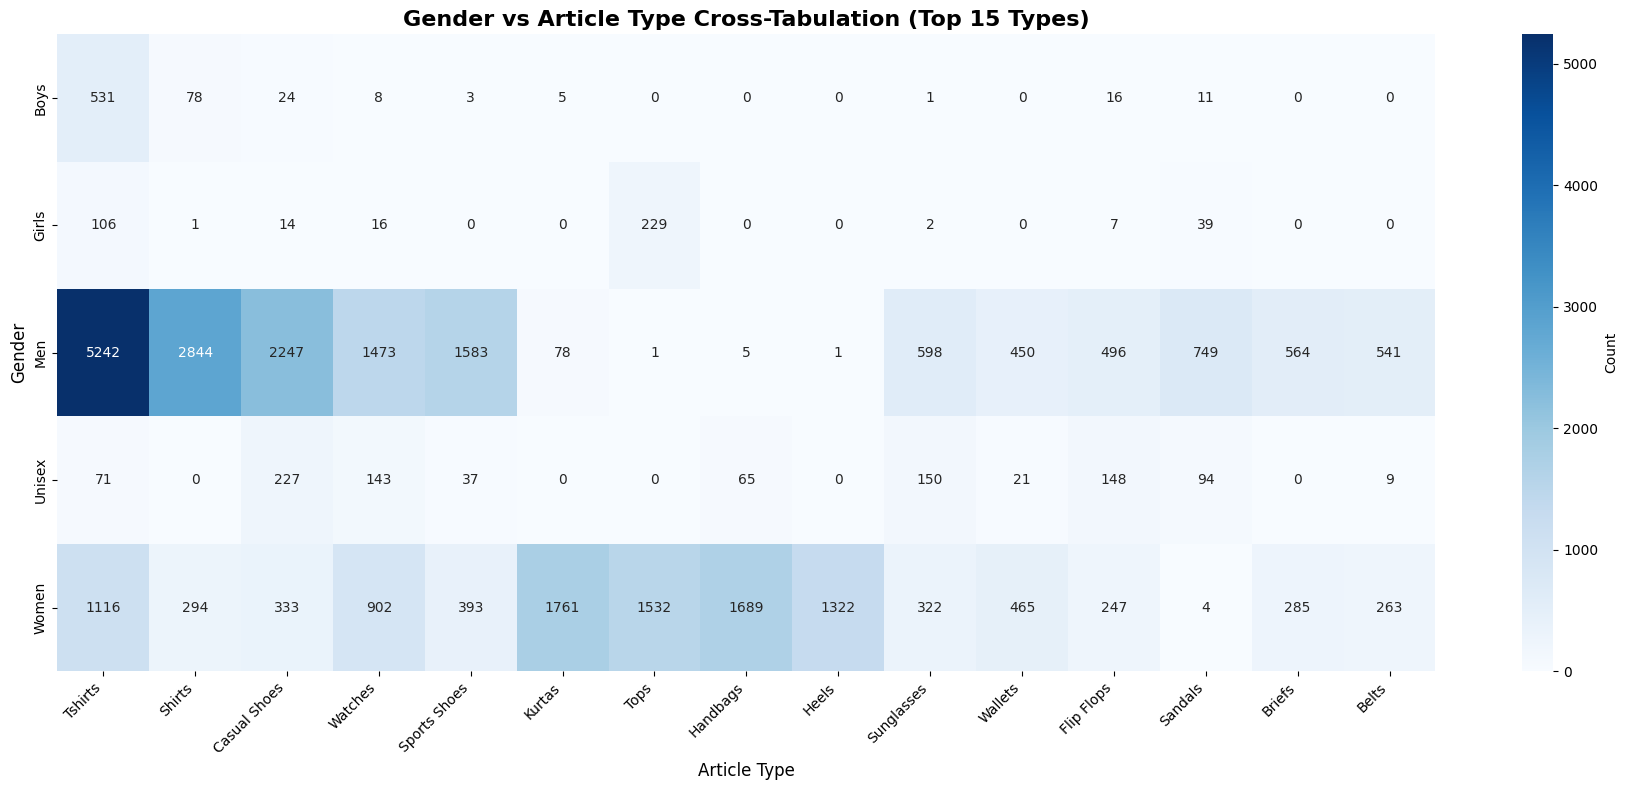

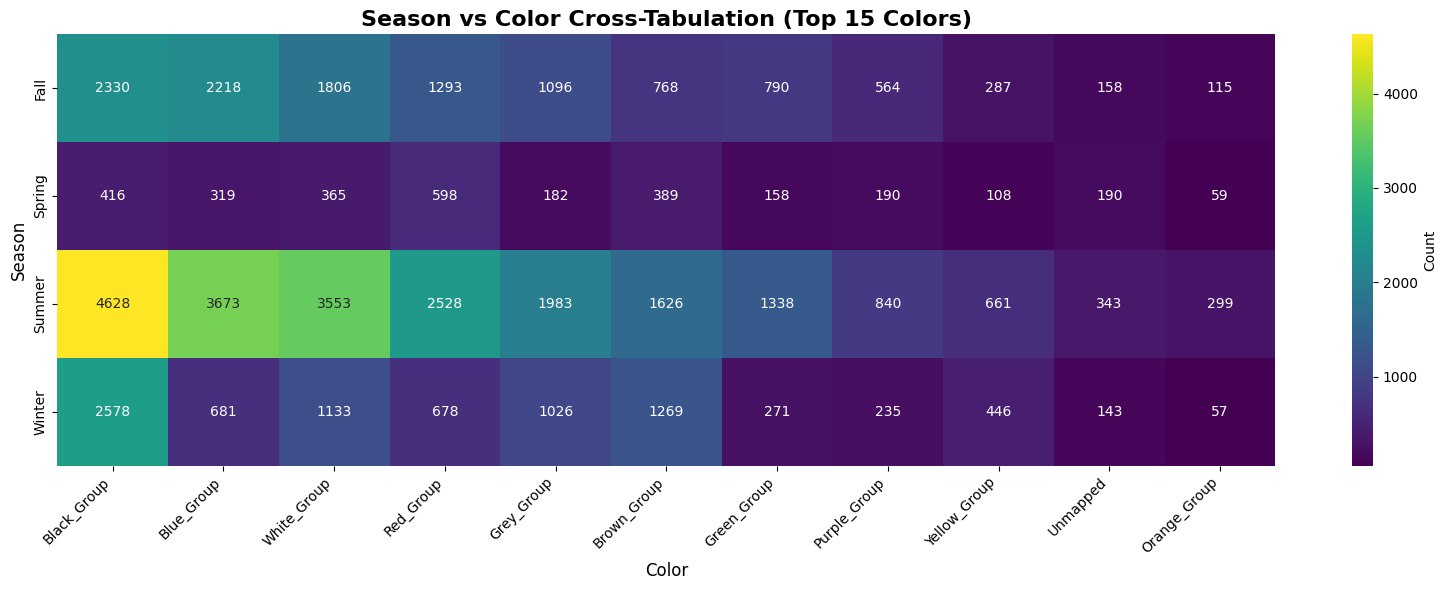

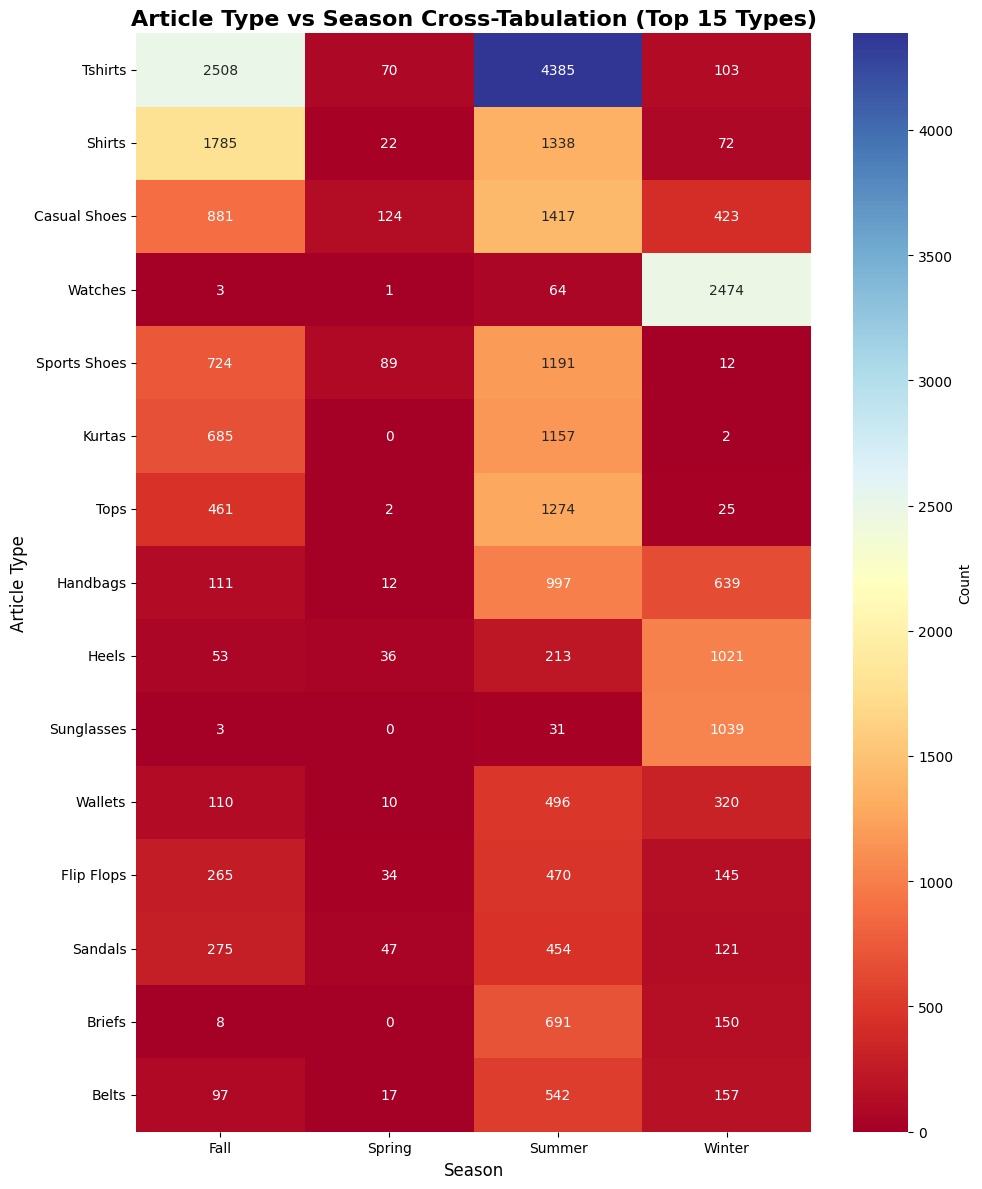

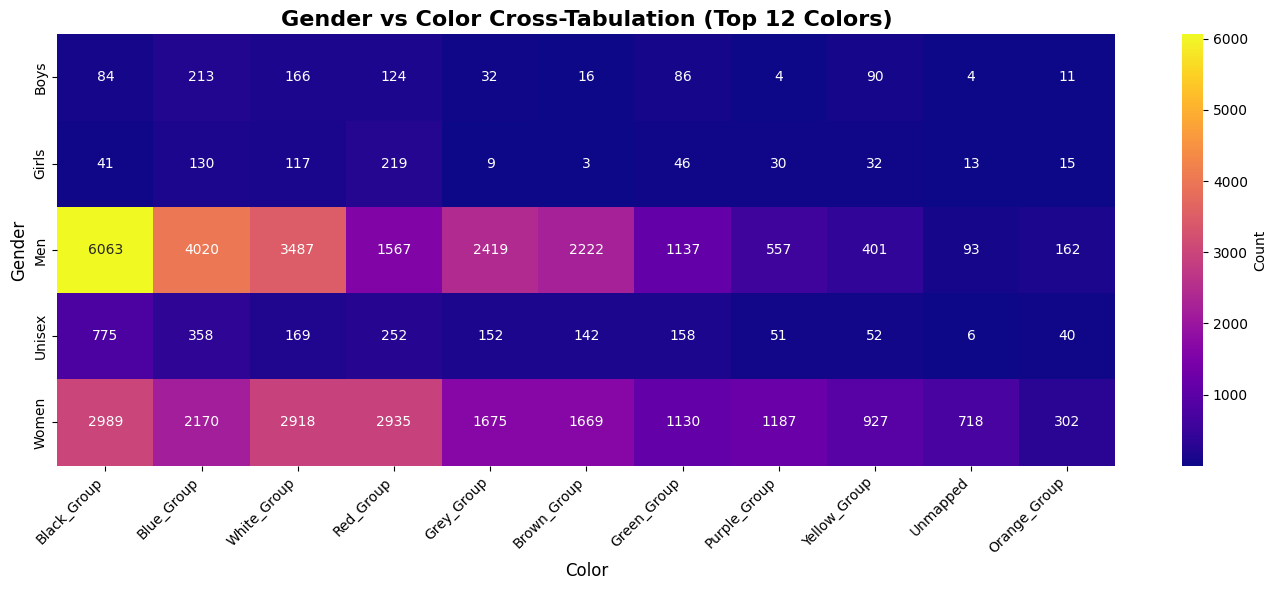


MULTI-LABEL RELATIONSHIP INSIGHTS

GENDER vs ARTICLE TYPE:
- Men's top categories: {'Tshirts': 5242, 'Shirts': 2844, 'Casual Shoes': 2247}
- Women's top categories: {'Kurtas': 1761, 'Handbags': 1689, 'Tops': 1532}
- Unisex top categories: {'Backpacks': 631, 'Casual Shoes': 227, 'Sunglasses': 150}

SEASON vs COLOR:
- Summer top colors: {'Black_Group': 4628, 'Blue_Group': 3673, 'White_Group': 3553}
- Winter top colors: {'Black_Group': 2578, 'Brown_Group': 1269, 'White_Group': 1133}
- Fall top colors: {'Black_Group': 2330, 'Blue_Group': 2218, 'White_Group': 1806}
- Spring top colors: {'Red_Group': 598, 'Black_Group': 416, 'Brown_Group': 389}



In [37]:
# Analyze relationships between target variables
def analyze_multi_label_relationships(df, target_variables):
    relationships = {}
    
    # Gender vs ArticleType
    if 'gender' in df.columns and 'articleType' in df.columns:
        gender_type = pd.crosstab(df['gender'], df['articleType'])
        relationships['gender_type'] = gender_type
        
        # Get top 15 article types for better visualization
        top_articles = df['articleType'].value_counts().head(15).index
        gender_type_subset = gender_type[top_articles]
        
        plt.figure(figsize=(18, 8))
        sns.heatmap(gender_type_subset, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
        plt.title('Gender vs Article Type Cross-Tabulation (Top 15 Types)', fontsize=16, fontweight='bold')
        plt.xlabel('Article Type', fontsize=12)
        plt.ylabel('Gender', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # Season vs BaseColour
    if 'season' in df.columns and 'baseColour' in df.columns:
        season_color = pd.crosstab(df['season'], df['baseColour'])
        relationships['season_color'] = season_color
        
        # Get top 15 colors for better visualization
        top_colors = df['baseColour'].value_counts().head(15).index
        season_color_subset = season_color[top_colors]
        
        plt.figure(figsize=(16, 6))
        sns.heatmap(season_color_subset, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})
        plt.title('Season vs Color Cross-Tabulation (Top 15 Colors)', fontsize=16, fontweight='bold')
        plt.xlabel('Color', fontsize=12)
        plt.ylabel('Season', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    # ArticleType vs Season
    if 'articleType' in df.columns and 'season' in df.columns:
        type_season = pd.crosstab(df['articleType'], df['season'])
        relationships['type_season'] = type_season
        
        # Get top 15 article types for better visualization
        top_types = df['articleType'].value_counts().head(15).index
        type_season_subset = type_season.loc[top_types]
        
        plt.figure(figsize=(10, 12))
        sns.heatmap(type_season_subset, annot=True, fmt='d', cmap='RdYlBu', cbar_kws={'label': 'Count'})
        plt.title('Article Type vs Season Cross-Tabulation (Top 15 Types)', fontsize=16, fontweight='bold')
        plt.xlabel('Season', fontsize=12)
        plt.ylabel('Article Type', fontsize=12)
        plt.tight_layout()
        plt.show()
    
    # Gender vs BaseColour
    if 'gender' in df.columns and 'baseColour' in df.columns:
        gender_color = pd.crosstab(df['gender'], df['baseColour'])
        relationships['gender_color'] = gender_color
        
        # Get top 12 colors for better visualization
        top_colors = df['baseColour'].value_counts().head(12).index
        gender_color_subset = gender_color[top_colors]
        
        plt.figure(figsize=(14, 6))
        sns.heatmap(gender_color_subset, annot=True, fmt='d', cmap='plasma', cbar_kws={'label': 'Count'})
        plt.title('Gender vs Color Cross-Tabulation (Top 12 Colors)', fontsize=16, fontweight='bold')
        plt.xlabel('Color', fontsize=12)
        plt.ylabel('Gender', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    
    return relationships

# Run relationship analysis
print("Analyzing Multi-Label Relationships...")
relationships = analyze_multi_label_relationships(styles_df, target_variables)

# Print insights about relationships
print("\n" + "="*80)
print("MULTI-LABEL RELATIONSHIP INSIGHTS")
print("="*80)

# Gender-ArticleType insights
if 'gender_type' in relationships:
    gender_type = relationships['gender_type']
    print("\nGENDER vs ARTICLE TYPE:")
    print("- Men's top categories:", gender_type.loc['Men'].nlargest(3).to_dict())
    print("- Women's top categories:", gender_type.loc['Women'].nlargest(3).to_dict())
    if 'Unisex' in gender_type.index:
        print("- Unisex top categories:", gender_type.loc['Unisex'].nlargest(3).to_dict())

# Season-Color insights
if 'season_color' in relationships:
    season_color = relationships['season_color']
    print("\nSEASON vs COLOR:")
    for season in ['Summer', 'Winter', 'Fall', 'Spring']:
        if season in season_color.index:
            print(f"- {season} top colors:", season_color.loc[season].nlargest(3).to_dict())

print("\n" + "="*80)


# Deep Learning Model

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import pickle

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Hyperparameters optimized for ConvNeXt-Tiny
IMG_SIZE = 224
BATCH_SIZE = 32  # Can potentially increase to 64 with ConvNeXt-Tiny
EPOCHS = 15
LEARNING_RATE = 1e-3
NUM_WORKERS = 4

# Target variables
target_variables = ['baseColour', 'articleType', 'season', 'gender']

# Optimized transforms for ConvNeXt-Tiny
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),  # Reduced rotation for fashion items
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Using device: cuda


In [39]:
class FashionDataset(Dataset):
    def __init__(self, dataframe, image_dir, target_variables, transform=None, label_encoders=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.target_variables = target_variables
        self.transform = transform
        
        # Use provided label encoders or create new ones
        if label_encoders is not None:
            self.label_encoders = label_encoders
        else:
            self.label_encoders = {}
            for var in target_variables:
                self.label_encoders[var] = LabelEncoder()
                self.label_encoders[var].fit(dataframe[var])
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        # Get image path
        img_id = self.dataframe.iloc[idx]['id']
        img_path = os.path.join(self.image_dir, f"{img_id}.jpg")
        
        # Load and transform image
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        
        # Get labels
        labels = {}
        for var in self.target_variables:
            label = self.dataframe.iloc[idx][var]
            encoded_label = self.label_encoders[var].transform([label])[0]
            labels[var] = torch.tensor(encoded_label, dtype=torch.long)
        
        return image, labels


In [40]:
class ConvNeXtFashionClassifier(nn.Module):
    def __init__(self, num_classes_dict, pretrained=True):
        super(ConvNeXtFashionClassifier, self).__init__()
        
        # Load pre-trained ConvNeXt-Tiny
        self.backbone = models.convnext_tiny(pretrained=pretrained)
        
        # Get the number of features from ConvNeXt-Tiny
        num_features = self.backbone.classifier[2].in_features  # 768 features for ConvNeXt-Tiny
        
        # Remove the final classification layer
        self.backbone.classifier = nn.Identity()
        
        # Freeze backbone for feature extraction
        for param in self.backbone.parameters():
            param.requires_grad = False
        
        # Shared dense layers optimized for ConvNeXt features
        self.shared_layers = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2)
        )
        
        # Classification heads for each target variable
        self.classifiers = nn.ModuleDict()
        for target, num_classes in num_classes_dict.items():
            # Adjusted head sizes based on target complexity
            if target == 'articleType':  # Most complex target (143 classes)
                head_size = 256
            elif target == 'baseColour':  # Medium complexity (46 classes)
                head_size = 128
            else:  # season (4 classes) and gender (5 classes)
                head_size = 64
            
            self.classifiers[target] = nn.Sequential(
                nn.Linear(256, head_size),
                nn.ReLU(inplace=True),
                nn.BatchNorm1d(head_size),
                nn.Dropout(0.2),
                nn.Linear(head_size, num_classes)
            )
    
    def forward(self, x):
        # Extract features using ConvNeXt-Tiny backbone
        features = self.backbone(x)
        
        features = torch.flatten(features, 1)
        # Shared representation
        shared_features = self.shared_layers(features)
        
        # Classification outputs
        outputs = {}
        for target, classifier in self.classifiers.items():
            outputs[target] = classifier(shared_features)
        
        return outputs


In [41]:
def filter_valid_images(styles_df, image_dir):
    """Filter DataFrame to only include rows with existing image files"""
    valid_indices = []
    
    for idx, row in styles_df.iterrows():
        img_id = row['id']
        img_path = os.path.join(image_dir, f"{img_id}.jpg")
        if os.path.exists(img_path):
            valid_indices.append(idx)
    
    filtered_df = styles_df.loc[valid_indices].reset_index(drop=True)
    print(f"Filtered dataset: {len(filtered_df)} valid samples out of {len(styles_df)}")
    
    return filtered_df

# Use before creating data loaders
styles_df = filter_valid_images(styles_df, '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images')

Filtered dataset: 44383 valid samples out of 44388


In [42]:
from tqdm.auto import tqdm

def create_data_loaders(styles_df, target_variables, image_dir):
    """Create train and validation data loaders"""
    # Stratified split based on gender and season
    stratify_col = styles_df['gender'].astype(str) + '_' + styles_df['season'].astype(str)
    
    train_df, val_df = train_test_split(
        styles_df, 
        test_size=0.2, 
        stratify=stratify_col, 
        random_state=42
    )
    
    # Fit label encoders on dataset before splitting
    label_encoders = {}
    print("Fitting label encoders...")
    for var in tqdm(target_variables, desc="Processing target variables"):
        label_encoders[var] = LabelEncoder()
        label_encoders[var].fit(styles_df[var])  # Full dataset

    # Create datasets with pre-fitted encoders
    train_dataset = FashionDataset(train_df, image_dir, target_variables, transform = train_transforms, label_encoders=label_encoders)
    val_dataset = FashionDataset(val_df, image_dir, target_variables, transform = val_transforms, label_encoders=label_encoders)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    
    return train_loader, val_loader, label_encoders

def calculate_aligned_class_weights(styles_df, target_variables, label_encoders):
    """Calculate class weights aligned with label encoders"""
    class_weights = {}
    
    print("Calculating class weights...")
    for var in tqdm(target_variables, desc="Processing target variables"):
        classes = label_encoders[var].classes_
        y_values = styles_df[var].values
        
        # Calculate balanced class weights
        weights = compute_class_weight('balanced', classes=classes, y=y_values)
        class_weights[var] = torch.tensor(weights, dtype=torch.float32).to(device)
        
        print(f"{var}: {len(classes)} classes, weight range: {weights.min():.3f} - {weights.max():.3f}")
    
    return class_weights


In [43]:
def train_convnext_model(model, train_loader, val_loader, num_epochs, class_weights):
    """Train ConvNeXt-Tiny multi-label fashion classifier"""
    # Loss functions for each target
    criterions = {}
    for target in target_variables:
        criterions[target] = nn.CrossEntropyLoss(weight=class_weights[target])
    
    # Optimizer with ConvNeXt-optimized settings
    optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.05)
    
    # Cosine annealing scheduler
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-6)
    
    # Training history
    history = {
        'train_loss': [],
        'val_loss': [],
        'val_accuracy': {target: [] for target in target_variables},
        'learning_rate': []
    }
    
    best_val_loss = float('inf')
    patience = 5
    patience_counter = 0
    
    # Main training loop with progress bar
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        num_batches = 0
        
        # Training batches with progress bar
        train_pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training", leave=False)
        
        for batch_idx, (images, labels) in enumerate(train_pbar):
            images = images.to(device)
            labels = {key: val.to(device) for key, val in labels.items()}
            
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            
            # Calculate weighted loss for each target
            total_loss = 0
            target_losses = {}
            
            for target in target_variables:
                loss = criterions[target](outputs[target], labels[target])
                target_losses[target] = loss.item()
                total_loss += loss
            
            # Backward pass
            total_loss.backward()
            
            # Gradient clipping for stability
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            train_loss += total_loss.item()
            num_batches += 1
            
            # Update progress bar
            train_pbar.set_postfix({
                'Loss': f'{total_loss.item():.4f}',
                'LR': f'{optimizer.param_groups[0]["lr"]:.6f}'
            })
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_predictions = {target: 0 for target in target_variables}
        total_samples = 0
        
        # Validation batches with progress bar
        val_pbar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation", leave=False)
        
        with torch.no_grad():
            for images, labels in val_pbar:
                images = images.to(device)
                labels = {key: val.to(device) for key, val in labels.items()}
                
                outputs = model(images)
                
                # Calculate validation loss
                batch_loss = 0
                for target in target_variables:
                    loss = criterions[target](outputs[target], labels[target])
                    batch_loss += loss
                    
                    # Calculate accuracy
                    _, predicted = torch.max(outputs[target].data, 1)
                    correct_predictions[target] += (predicted == labels[target]).sum().item()
                
                val_loss += batch_loss.item()
                total_samples += images.size(0)
                
                # Update progress bar
                val_pbar.set_postfix({'Val Loss': f'{batch_loss.item():.4f}'})
        
        # Calculate metrics
        avg_train_loss = train_loss / num_batches
        avg_val_loss = val_loss / len(val_loader)
        
        val_accuracies = {}
        for target in target_variables:
            val_accuracies[target] = correct_predictions[target] / total_samples
        
        # Update history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['learning_rate'].append(optimizer.param_groups[0]['lr'])
        for target in target_variables:
            history['val_accuracy'][target].append(val_accuracies[target])
        
        # Print epoch results
        print(f'\n{"="*70}')
        print(f'EPOCH [{epoch+1}/{num_epochs}] RESULTS')
        print(f'{"="*70}')
        print(f'Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}')
        print(f'Learning Rate: {optimizer.param_groups[0]["lr"]:.6f}')
        print(f'Target Accuracies:')
        for target in target_variables:
            print(f'  {target:>12}: {val_accuracies[target]:.4f}')
        
        # Early stopping check
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            torch.save(model.state_dict(), '/kaggle/working/best_convnext_fashion_model.pth')
            print(f'✓ New best model saved! Val Loss: {best_val_loss:.4f}')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping triggered after {patience} epochs without improvement')
                break
        
        # Update learning rate
        scheduler.step()
        print(f'{"="*70}\n')
    
    return history


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, val_loader, label_encoders):
    """Comprehensive model evaluation with progress bars"""
    model.eval()
    
    # Store predictions and true labels
    all_predictions = {target: [] for target in target_variables}
    all_labels = {target: [] for target in target_variables}
    
    print("Evaluating model...")
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Evaluation Progress"):
            images = images.to(device)
            labels = {key: val.to(device) for key, val in labels.items()}
            
            outputs = model(images)
            
            for target in target_variables:
                _, predicted = torch.max(outputs[target].data, 1)
                all_predictions[target].extend(predicted.cpu().numpy())
                all_labels[target].extend(labels[target].cpu().numpy())
    
    # Calculate metrics
    results = {}
    print("\nCalculating metrics...")
    for target in tqdm(target_variables, desc="Processing targets"):
        results[target] = {
            'accuracy': accuracy_score(all_labels[target], all_predictions[target]),
            'precision': precision_score(all_labels[target], all_predictions[target], average='weighted', zero_division=0),
            'recall': recall_score(all_labels[target], all_predictions[target], average='weighted', zero_division=0),
            'f1_score': f1_score(all_labels[target], all_predictions[target], average='weighted', zero_division=0)
        }
    
    # Print results
    print("\n" + "="*80)
    print("CONVNEXT-TINY FASHION CLASSIFICATION RESULTS")
    print("="*80)
    
    for target in target_variables:
        print(f"\n{target.upper()}:")
        print(f"  Accuracy: {results[target]['accuracy']:.4f}")
        print(f"  Precision: {results[target]['precision']:.4f}")
        print(f"  Recall: {results[target]['recall']:.4f}")
        print(f"  F1-Score: {results[target]['f1_score']:.4f}")
    
    return results
def plot_training_history(history):
    """Plot training progress and results"""
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Training and validation loss
    axes[0, 0].plot(history['train_loss'], label='Training Loss', linewidth=2)
    axes[0, 0].plot(history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 0].set_title('ConvNeXt-Tiny: Training Progress', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Learning rate schedule
    axes[0, 1].plot(history['learning_rate'], color='red', linewidth=2)
    axes[0, 1].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Learning Rate')
    axes[0, 1].set_yscale('log')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Accuracy plots for each target
    colors = ['blue', 'green', 'orange', 'purple']
    for i, target in enumerate(target_variables):
        row = (i + 2) // 3
        col = (i + 2) % 3
        
        axes[row, col].plot(history['val_accuracy'][target], 
                           color=colors[i], linewidth=2, marker='o', markersize=4)
        axes[row, col].set_title(f'{target.capitalize()} Accuracy', fontsize=14, fontweight='bold')
        axes[row, col].set_xlabel('Epoch')
        axes[row, col].set_ylabel('Accuracy')
        axes[row, col].grid(True, alpha=0.3)
        
        # Add final accuracy text
        final_acc = history['val_accuracy'][target][-1]
        axes[row, col].text(0.02, 0.98, f'Final: {final_acc:.3f}', 
                           transform=axes[row, col].transAxes, 
                           verticalalignment='top', fontweight='bold',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle('ConvNeXt-Tiny Fashion Classification Training Results', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()


In [46]:
def run_complete_pipeline(styles_df, image_dir='/kaggle/input/fashion-product-images-dataset/fashion-dataset/images'):
    """Run the complete ConvNeXt-Tiny fashion classification pipeline"""
    
    print("Starting ConvNeXt-Tiny Fashion Classification Pipeline...")
    print("="*70)
    
    # 1. Create data loaders
    print("1. Creating data loaders...")
    train_loader, val_loader, label_encoders = create_data_loaders(styles_df, target_variables, image_dir)

    with open('label_encoders.pkl', 'wb') as f:
        pickle.dump(label_encoders, f)

    print("Label encoders saved successfully!")
    
    # 2. Calculate class weights
    print("2. Calculating class weights...")
    class_weights = calculate_aligned_class_weights(styles_df, target_variables, label_encoders)
    
    # 3. Calculate number of classes
    num_classes_dict = {var: styles_df[var].nunique() for var in target_variables}
    
    # 4. Initialize model
    print("3. Initializing ConvNeXt-Tiny model...")
    model = ConvNeXtFashionClassifier(num_classes_dict, pretrained=True)
    model = model.to(device)
    
    # Print model info
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    print(f"Total parameters: {total_params:,}")
    print(f"Trainable parameters: {trainable_params:,}")
    print(f"Target classes: {num_classes_dict}")
    
    # 5. Train model
    print("4. Training model...")
    # model.load_state_dict(torch.load('/kaggle/working/best_convnext_fashion_model.pth'))
    history = train_convnext_model(model, train_loader, val_loader, EPOCHS, class_weights)
    
    return model, results, history

# Run the complete pipeline
model, results, history = run_complete_pipeline(styles_df)


Starting ConvNeXt-Tiny Fashion Classification Pipeline...
1. Creating data loaders...
Fitting label encoders...


Processing target variables:   0%|          | 0/4 [00:00<?, ?it/s]

Label encoders saved successfully!
2. Calculating class weights...
Calculating class weights...


Processing target variables:   0%|          | 0/4 [00:00<?, ?it/s]

baseColour: 11 classes, weight range: 0.405 - 7.613
articleType: 142 classes, weight range: 0.044 - 312.556
season: 4 classes, weight range: 0.517 - 3.732
gender: 5 classes, weight range: 0.401 - 13.552
3. Initializing ConvNeXt-Tiny model...


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total parameters: 28,516,290
Trainable parameters: 697,698
Target classes: {'baseColour': 11, 'articleType': 142, 'season': 4, 'gender': 5}
4. Training model...


Epoch 1/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Epoch 1/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [1/15] RESULTS
Train Loss: 6.0254 | Val Loss: 4.4808
Learning Rate: 0.001000
Target Accuracies:
    baseColour: 0.4993
   articleType: 0.6510
        season: 0.6108
        gender: 0.8135
✓ New best model saved! Val Loss: 4.4808



Epoch 2/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 2/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [2/15] RESULTS
Train Loss: 4.6714 | Val Loss: 4.0717
Learning Rate: 0.000989
Target Accuracies:
    baseColour: 0.5691
   articleType: 0.7320
        season: 0.5812
        gender: 0.8203
✓ New best model saved! Val Loss: 4.0717



Epoch 3/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 3/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
if w.is_alive():
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
       self._shutdown_workers() 
    File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
 ^    ^if w.is_alive():^
 ^ ^ ^ ^^ ^ ^^ ^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^^ ^^ ^ ^ ^  ^
   File "/usr/lib


EPOCH [3/15] RESULTS
Train Loss: 4.2311 | Val Loss: 3.8512
Learning Rate: 0.000957
Target Accuracies:
    baseColour: 0.5858
   articleType: 0.7665
        season: 0.6253
        gender: 0.8230
✓ New best model saved! Val Loss: 3.8512



Epoch 4/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Epoch 4/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [4/15] RESULTS
Train Loss: 4.0056 | Val Loss: 3.6290
Learning Rate: 0.000905
Target Accuracies:
    baseColour: 0.6103
   articleType: 0.7543
        season: 0.6010
        gender: 0.8318
✓ New best model saved! Val Loss: 3.6290



Epoch 5/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Epoch 5/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [5/15] RESULTS
Train Loss: 3.7719 | Val Loss: 3.4739
Learning Rate: 0.000835
Target Accuracies:
    baseColour: 0.6063
   articleType: 0.7918
        season: 0.6311
        gender: 0.8542
✓ New best model saved! Val Loss: 3.4739



Epoch 6/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 6/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [6/15] RESULTS
Train Loss: 3.6007 | Val Loss: 3.2891
Learning Rate: 0.000750
Target Accuracies:
    baseColour: 0.6364
   articleType: 0.7902
        season: 0.6235
        gender: 0.8529
✓ New best model saved! Val Loss: 3.2891



Epoch 7/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 7/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^Exception ignored in: ^^<function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>^^^
Traceback (most recent call last):

AssertionError  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
: can only test a child process    
self._shutdown_workers()
Exception ignored in:   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/d


EPOCH [7/15] RESULTS
Train Loss: 3.4387 | Val Loss: 3.3295
Learning Rate: 0.000655
Target Accuracies:
    baseColour: 0.6397
   articleType: 0.7866
        season: 0.6243
        gender: 0.8344



Epoch 8/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Epoch 8/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [8/15] RESULTS
Train Loss: 3.2595 | Val Loss: 3.3000
Learning Rate: 0.000553
Target Accuracies:
    baseColour: 0.6399
   articleType: 0.7859
        season: 0.6409
        gender: 0.8484



Epoch 9/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Epoch 9/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [9/15] RESULTS
Train Loss: 3.1645 | Val Loss: 3.2310
Learning Rate: 0.000448
Target Accuracies:
    baseColour: 0.6524
   articleType: 0.7795
        season: 0.6369
        gender: 0.8530
✓ New best model saved! Val Loss: 3.2310



Epoch 10/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Epoch 10/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [10/15] RESULTS
Train Loss: 2.9976 | Val Loss: 3.1030
Learning Rate: 0.000346
Target Accuracies:
    baseColour: 0.6556
   articleType: 0.8111
        season: 0.6405
        gender: 0.8496
✓ New best model saved! Val Loss: 3.1030



Epoch 11/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: 
can only test a child processException ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16

Epoch 11/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16


EPOCH [11/15] RESULTS
Train Loss: 2.9128 | Val Loss: 3.0126
Learning Rate: 0.000251
Target Accuracies:
    baseColour: 0.6689
   articleType: 0.8163
        season: 0.6673
        gender: 0.8659
✓ New best model saved! Val Loss: 3.0126



Epoch 12/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>    
if w.is_alive():Traceback (most recent call last):

    File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
     self._shutdown_workers()  
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
     if w.is_alive():^^^
^ ^ ^  ^^   ^^^^^^^^
^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'^
^^ ^ ^  ^ ^
    File "/usr/lib

Epoch 12/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [12/15] RESULTS
Train Loss: 2.8204 | Val Loss: 2.9485
Learning Rate: 0.000166
Target Accuracies:
    baseColour: 0.6734
   articleType: 0.8223
        season: 0.6520
        gender: 0.8762
✓ New best model saved! Val Loss: 2.9485



Epoch 13/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Epoch 13/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [13/15] RESULTS
Train Loss: 2.7361 | Val Loss: 2.9534
Learning Rate: 0.000096
Target Accuracies:
    baseColour: 0.6798
   articleType: 0.8199
        season: 0.6533
        gender: 0.8782



Epoch 14/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Epoch 14/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [14/15] RESULTS
Train Loss: 2.7030 | Val Loss: 2.9292
Learning Rate: 0.000044
Target Accuracies:
    baseColour: 0.6818
   articleType: 0.8265
        season: 0.6573
        gender: 0.8728
✓ New best model saved! Val Loss: 2.9292



Epoch 15/15 - Training:   0%|          | 0/1110 [00:00<?, ?it/s]

Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()

  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    if w.is_alive():
     self._shutdown_workers()    
   File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
 ^    if w.is_alive():^
^ ^ ^^ ^^^^  ^ ^ 
^  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
 ^ ^ ^  ^  ^ ^   ^^^^^
^  File "/

Epoch 15/15 - Validation:   0%|          | 0/278 [00:00<?, ?it/s]


EPOCH [15/15] RESULTS
Train Loss: 2.6801 | Val Loss: 2.9027
Learning Rate: 0.000012
Target Accuracies:
    baseColour: 0.6788
   articleType: 0.8281
        season: 0.6580
        gender: 0.8709
✓ New best model saved! Val Loss: 2.9027

5. Loading best model and evaluating...
Evaluating model...


Evaluation Progress:   0%|          | 0/278 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e895f9ae660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 16


Calculating metrics...


Processing targets:   0%|          | 0/4 [00:00<?, ?it/s]

NameError: name 'accuracy_score' is not defined

In [48]:
print("5. Loading best model and evaluating...")
results = evaluate_model(model, val_loader, label_encoders)
    
# 7. Plot results
print("6. Plotting training history...")
plot_training_history(history)

5. Loading best model and evaluating...


NameError: name 'model' is not defined